In [118]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [119]:
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer = load_breast_cancer()

In [120]:
# Separate features and target variable
X = cancer.data
y = cancer.target

In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
# Define the model
model = Sequential()
model.add(Dense(2, activation='softmax', input_shape=(30,)))

In [124]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
# Initialize lists to store epoch numbers, losses, and accuracies
epoch_nums = []
train_losses = []
train_accuracies = []

In [126]:
# Train the model
for epoch in range(50):
    # Perform one forward pass and backward pass on the training data
    history = model.fit(X_train, tf.keras.utils.to_categorical(y_train, 2), epochs=1, batch_size=32, verbose=0)
    
    # Evaluate the model on the training data
    train_loss, train_accuracy = model.evaluate(X_train, tf.keras.utils.to_categorical(y_train, 2), verbose=0)
    
    # Store the results for visualization
    epoch_nums.append(epoch + 1)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Print the epoch number, train loss, and train accuracy
    print("Epoch:", epoch + 1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_accuracy)

Epoch: 1
Train Loss: 1.0113829374313354
Train Accuracy: 0.3780219852924347
Epoch: 2
Train Loss: 0.8143518567085266
Train Accuracy: 0.5032967329025269
Epoch: 3
Train Loss: 0.6694221496582031
Train Accuracy: 0.6461538672447205
Epoch: 4
Train Loss: 0.5649010539054871
Train Accuracy: 0.7230769395828247
Epoch: 5
Train Loss: 0.4873887896537781
Train Accuracy: 0.8087912201881409
Epoch: 6
Train Loss: 0.4304758310317993
Train Accuracy: 0.8505494594573975
Epoch: 7
Train Loss: 0.3847169876098633
Train Accuracy: 0.8725274801254272
Epoch: 8
Train Loss: 0.3494572937488556
Train Accuracy: 0.892307698726654
Epoch: 9
Train Loss: 0.32037466764450073
Train Accuracy: 0.9054945111274719
Epoch: 10
Train Loss: 0.29578256607055664
Train Accuracy: 0.9098901152610779
Epoch: 11
Train Loss: 0.27605825662612915
Train Accuracy: 0.9164835214614868
Epoch: 12
Train Loss: 0.2583741843700409
Train Accuracy: 0.9274725317955017
Epoch: 13
Train Loss: 0.24309371411800385
Train Accuracy: 0.9340659379959106
Epoch: 14
Train Lo

In [128]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, 2), verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)
f1 = f1_score(y_test, y_pred)

4/4 [==============================] - 0s 7ms/step


In [129]:
# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("F1-Score:", f1)

Test Loss: 0.08879519253969193
Test Accuracy: 0.9649122953414917
F1-Score: 0.9722222222222222


In [130]:
# Print the final parameters
for i, layer in enumerate(model.layers):
    print("Layer", i+1, "Weights:", layer.get_weights())

Layer 1 Weights: [array([[-0.16793253,  0.03120785],
       [ 0.50715166,  0.0329132 ],
       [ 0.09760094, -0.11275725],
       [ 0.18383671,  0.01623541],
       [ 0.02887167, -0.34897432],
       [-0.10013442,  0.3019098 ],
       [ 0.16928007, -0.4494831 ],
       [ 0.6087177 , -0.1081849 ],
       [-0.16378966,  0.08158503],
       [ 0.10597698,  0.20026544],
       [ 0.41691613, -0.16441017],
       [-0.3594631 , -0.08728939],
       [ 0.3153928 , -0.42699254],
       [ 0.13121004, -0.17815626],
       [-0.23754185, -0.15658417],
       [-0.23021711,  0.205553  ],
       [-0.07982615, -0.10885046],
       [ 0.11473496,  0.21004666],
       [ 0.08914617, -0.104909  ],
       [ 0.05510001,  0.5359733 ],
       [-0.08573683, -0.5979299 ],
       [ 0.43304667, -0.21160285],
       [ 0.04734026,  0.10056255],
       [-0.1826064 , -0.6234969 ],
       [-0.17683902, -0.15040596],
       [-0.24983835, -0.44847223],
       [ 0.27788568, -0.21326913],
       [ 0.61337876, -0.5878231 ],
  

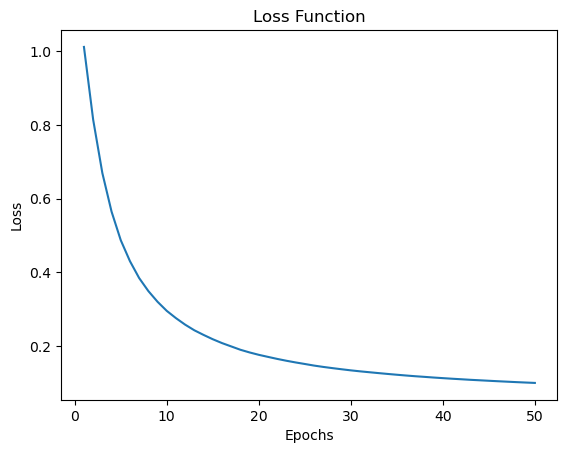

In [131]:
# Plot the loss function vs. epochs
plt.plot(epoch_nums, train_losses)
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

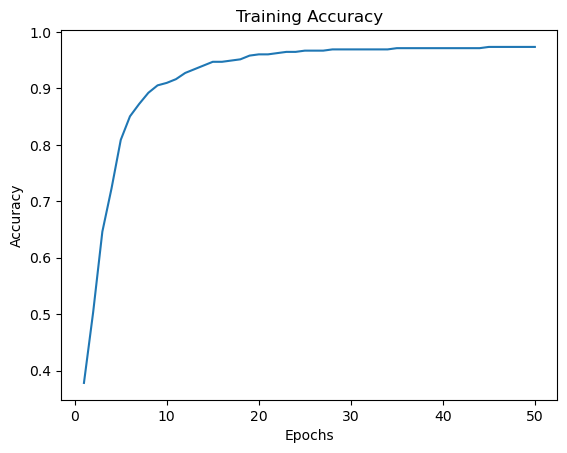

In [132]:
# Plot the training accuracy vs. epochs
plt.plot(epoch_nums, train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [133]:
# Generate predictions on the test set
y_pred_prob = model.predict(X_test)[:, 1]

4/4 [==============================] - 0s 4ms/step


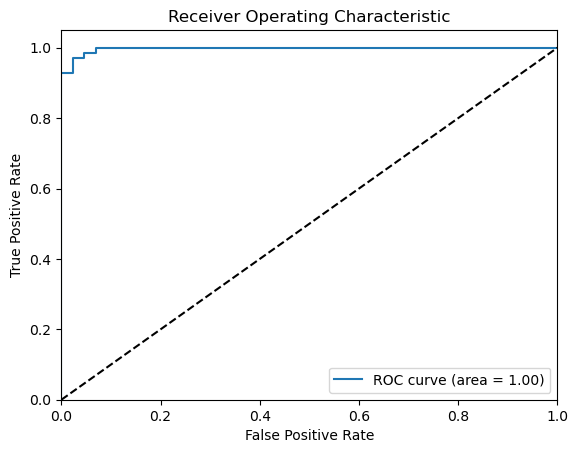

In [134]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [135]:
# Visualize a few examples of misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0][:5]
misclassified_samples = X_test[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]
misclassified_pred = y_pred[misclassified_indices]

for i, sample in enumerate(misclassified_samples):
    print("Misclassified Sample", i + 1)
    print("True Label:", misclassified_labels[i])
    print("Predicted Label:", misclassified_pred[i])
    print("Features:", sample)
    print("---------")

Misclassified Sample 1
True Label: 0
Predicted Label: 1
Features: [-0.08993252 -0.79671034 -0.05977463 -0.19821465  0.35634783  0.4651665
 -0.13867567  0.06339385 -0.54261701  0.40312655 -0.43597673 -1.07582927
 -0.435613   -0.35438207 -0.74409507 -0.26823247 -0.47441781 -0.42752674
 -1.02579279 -0.24800235  0.06968337 -0.77176511  0.09589304 -0.11390033
  0.41496361  0.65522912  0.01580277  0.369597   -0.50097175  1.07313539]
---------
Misclassified Sample 2
True Label: 0
Predicted Label: 1
Features: [-0.04463148 -0.5010269  -0.01861438 -0.14660035  0.99628119  0.46325857
  0.11327535  0.10995031  0.35332661 -0.20227891  0.08125937 -0.72601977
 -0.14270817 -0.09179518 -0.20896683  0.06211843 -0.05087698  0.24272529
  0.00569498 -0.4042485   0.03223001 -0.57204371  0.02990222 -0.0899165
  0.85300607  0.47440179  0.22137928  0.3558048   0.25835983 -0.24106908]
---------
Misclassified Sample 3
True Label: 0
Predicted Label: 1
Features: [ 0.1025969   0.53386514  0.09745752 -0.01742358 -0.